### Machine Learning I Project:


Set up a supervised classification ML experiment predicting classes on the basis of numeric features (in case you use text as features, use the ‘recipes’ in the ‘text analysis pipeline’). 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chess = pd.read_csv('games.csv')
chess.sample(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
10341,UXUkBXj1,True,1.402363e+12,1.402364e+12,118,resign,black,10+0,theshelton,1669,ciklyk,1850,e4 c5 Nc3 Nc6 Nf3 e6 Bb5 Nge7 O-O a6 Bc4 b5 Be...,B25,Sicilian Defense: Closed Variation | Traditional,4
13863,3HKtv6te,True,1.503081e+12,1.503081e+12,46,resign,white,10+0,lupanama,2413,shiwen,2219,d4 Nf6 c4 e6 Nf3 d5 Nc3 Bb4 e3 O-O Be2 dxc4 O-...,E51,Nimzo-Indian Defense: Normal Variation | Rago...,10
15439,tpAPwIMR,True,1.501789e+12,1.501789e+12,58,mate,black,10+0,dazkins,1469,pedro84,1609,e4 e5 Nf3 Nc6 Bb5 Nge7 Nc3 a6 Ba4 b5 Bb3 Nd4 N...,C60,Ruy Lopez: Cozio Defense,6


## Data preprocessing (feature selection, missing values, …)

In [3]:
#check for missing values
chess.isnull().sum()
#No missing values!

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [4]:
# select relevant categories
# Winner, victory_status, white_rating, black_rating, moves, opening_eco, opening_ply, (opening_name)
chess =  pd.read_csv("games.csv", usecols=["winner", "white_rating", "black_rating", "opening_eco", "opening_ply","rated",'turns'])
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rated         20058 non-null  bool  
 1   turns         20058 non-null  int64 
 2   winner        20058 non-null  object
 3   white_rating  20058 non-null  int64 
 4   black_rating  20058 non-null  int64 
 5   opening_eco   20058 non-null  object
 6   opening_ply   20058 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 959.9+ KB


In [5]:
chess.head()

,rated,turns,winner,white_rating,black_rating,opening_eco,opening_ply
0,False,13,white,1500,1191,D10,5
1,True,16,black,1322,1261,B00,4
2,True,61,white,1496,1500,C20,3
3,True,61,white,1439,1454,D02,3
4,True,95,white,1523,1469,C41,5


X values/features: 
- rated: categorical
- turns: numerical
- white_rating & black_rating: integer
- opening_eco (Standardised Code for any given opening): categorical
- opening_ply: integer

Target Variable:
- winner :  categorical  

In [6]:
chess.winner.value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

In [7]:
# imbalance for draws: leave out
chess = chess[chess["winner"] != 'draw']
print(chess.info())
print(chess.winner.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19108 entries, 0 to 20057
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rated         19108 non-null  bool  
 1   turns         19108 non-null  int64 
 2   winner        19108 non-null  object
 3   white_rating  19108 non-null  int64 
 4   black_rating  19108 non-null  int64 
 5   opening_eco   19108 non-null  object
 6   opening_ply   19108 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 1.0+ MB
None
white    10001
black     9107
Name: winner, dtype: int64


In [8]:
# encode categorical features (opening_eco & rated)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
chess["rated"] = le.fit_transform(chess["rated"])
chess["opening_eco"] = le.fit_transform(chess["opening_eco"])
chess.head()

,rated,turns,winner,white_rating,black_rating,opening_eco,opening_ply
0,0,13,white,1500,1191,244,5
1,1,16,black,1322,1261,70,4
2,1,61,white,1496,1500,170,3
3,1,61,white,1439,1454,237,3
4,1,95,white,1523,1469,190,5


In [10]:
X = chess.drop(['winner'], axis=1)
y = chess['winner']

### Splitting Data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_hold, y_train, y_hold = train_test_split(X,y, test_size = 0.50, stratify=y, random_state= 11)

In [13]:
X_dev, X_test, y_dev, y_test = train_test_split(X_hold,y_hold, test_size = 0.50, stratify = y_hold, random_state = 11)

## Fitting the data Using Pipeline
Setting up a pipeline with preprocessing and various ML algorithms

In [14]:
# pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict # DEZE GEBRUIKEN VOOR EVALUATIE TRAIN

# classifiers
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # PREDICT EN DEZE METRICS GEBRUIKEN VOOR DEV EN TEST

In [15]:
# custom transformer
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        
    def fit(self, x, y=None):
        return self
    
    def transform(self, data_dict):
        return data_dict[self.key]

In [16]:
# try out different algorithms
cat_features = ["opening_eco", "rated"]
num_features = ["white_rating", "black_rating","opening_ply","turns"]

classifier = [LinearSVC(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]
for alg in classifier:
    print("RESULTS FOR", alg, ':')
    # pipeline
    cat_pipe = Pipeline([
        ('selector', ItemSelector(key=cat_features)),
    ])

    num_pipe = Pipeline([
        ('selector', ItemSelector(key=num_features)),
        ('scaler', StandardScaler())
    ])

    pipe = Pipeline([
        ('features', FeatureUnion([
            ('cat_pipe', cat_pipe),
            ('num_pipe', num_pipe)
        ])),
        ('alg', alg)
    ])

    pipe.fit(X_train, y_train)
    
    # ZIE VERSCHIL EVALUATIE
    
    # GEBRUIK DEZE METHODE VOOR DEV EN TEST
    #predictions = pipe.predict(X_dev)
    #print(classification_report(y_dev, predictions))
    
    # GEBRUIK DEZE METHODE VOOR ALS JE BEZIG BENT OP TRAININGDATA
    # = CROSS-VALIDATION METHODE = BETROUWBAARDER DAN GEWOON 1X PREDICTEN OP HOLDOUT SET WANT HANGT AF VAN SAMPLE
    cv_results = cross_val_predict(pipe, X_train, y_train, cv=10, n_jobs=-1)
    print(classification_report(y_train, cv_results))

RESULTS FOR LinearSVC() :


C:\Users\robin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

       black       0.55      0.47      0.51      4554
       white       0.57      0.66      0.61      5000

    accuracy                           0.57      9554
   macro avg       0.56      0.56      0.56      9554
weighted avg       0.56      0.57      0.56      9554

RESULTS FOR SVC() :
              precision    recall  f1-score   support

       black       0.52      0.12      0.20      4554
       white       0.53      0.90      0.67      5000

    accuracy                           0.53      9554
   macro avg       0.52      0.51      0.43      9554
weighted avg       0.52      0.53      0.44      9554

RESULTS FOR DecisionTreeClassifier() :
              precision    recall  f1-score   support

       black       0.59      0.60      0.59      4554
       white       0.63      0.63      0.63      5000

    accuracy                           0.61      9554
   macro avg       0.61      0.61      0.61      9554
weighted avg   

## Feature Reduction

In [17]:
#Dimension reduction
# based on rating alone

num_features = ["white_rating", "black_rating"]

classifier = [LinearSVC(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]
for alg in classifier:
    print("RESULTS FOR", alg, ':')
    # pipeline

    num_pipe = Pipeline([
        ('selector', ItemSelector(key=num_features)),
        ('scaler', StandardScaler())
    ])

    pipe = Pipeline([
        ('features', FeatureUnion([
            ('num_pipe', num_pipe)
        ])),
        ('alg', alg)
    ])

    pipe.fit(X_train, y_train)
    cv_results = cross_val_predict(pipe, X_train, y_train, cv=10, n_jobs=-1)
    print(classification_report(y_train, cv_results))

RESULTS FOR LinearSVC() :
              precision    recall  f1-score   support

       black       0.66      0.58      0.62      4554
       white       0.65      0.73      0.69      5000

    accuracy                           0.66      9554
   macro avg       0.66      0.65      0.65      9554
weighted avg       0.66      0.66      0.65      9554

RESULTS FOR SVC() :
              precision    recall  f1-score   support

       black       0.66      0.55      0.60      4554
       white       0.65      0.74      0.69      5000

    accuracy                           0.65      9554
   macro avg       0.65      0.65      0.65      9554
weighted avg       0.65      0.65      0.65      9554

RESULTS FOR DecisionTreeClassifier() :
              precision    recall  f1-score   support

       black       0.58      0.59      0.58      4554
       white       0.62      0.61      0.61      5000

    accuracy                           0.60      9554
   macro avg       0.60      0.60      0.60

In [18]:
# - rating
cat_features = ["opening_eco"]
num_features = ["white_rating", "black_rating","opening_ply","turns"]

classifier = [LinearSVC(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]
for alg in classifier:
    print("RESULTS FOR", alg, ':')
    # pipeline
    cat_pipe = Pipeline([
        ('selector', ItemSelector(key=cat_features)),
    ])

    num_pipe = Pipeline([
        ('selector', ItemSelector(key=num_features)),
        ('scaler', StandardScaler())
    ])

    pipe = Pipeline([
        ('features', FeatureUnion([
            ('cat_pipe', cat_pipe),
            ('num_pipe', num_pipe)
        ])),
        ('alg', alg)
    ])

    pipe.fit(X_train, y_train)
    cv_results = cross_val_predict(pipe, X_train, y_train, cv=10, n_jobs=-1)
    print(classification_report(y_train, cv_results))

RESULTS FOR LinearSVC() :


C:\Users\robin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

       black       0.53      0.58      0.55      4554
       white       0.58      0.53      0.55      5000

    accuracy                           0.55      9554
   macro avg       0.55      0.55      0.55      9554
weighted avg       0.55      0.55      0.55      9554

RESULTS FOR SVC() :
              precision    recall  f1-score   support

       black       0.52      0.12      0.20      4554
       white       0.53      0.90      0.66      5000

    accuracy                           0.53      9554
   macro avg       0.52      0.51      0.43      9554
weighted avg       0.52      0.53      0.44      9554

RESULTS FOR DecisionTreeClassifier() :
              precision    recall  f1-score   support

       black       0.59      0.59      0.59      4554
       white       0.63      0.63      0.63      5000

    accuracy                           0.61      9554
   macro avg       0.61      0.61      0.61      9554
weighted avg   

In [19]:
#dimension reduction
#- ratings and -rated
cat_features = ["opening_eco",]
num_features = ["opening_ply","turns"]

classifier = [LinearSVC(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]
for alg in classifier:
    print("RESULTS FOR", alg, ':')
    # pipeline
    cat_pipe = Pipeline([
        ('selector', ItemSelector(key=cat_features)),
    ])

    num_pipe = Pipeline([
        ('selector', ItemSelector(key=num_features)),
        ('scaler', StandardScaler())
    ])

    pipe = Pipeline([
        ('features', FeatureUnion([
            ('cat_pipe', cat_pipe),
            ('num_pipe', num_pipe)
        ])),
        ('alg', alg)
    ])

    pipe.fit(X_train, y_train)
    cv_results = cross_val_predict(pipe, X_train, y_train, cv=10, n_jobs=-1)
    print(classification_report(y_train, cv_results))

#Decisiontree seems to perform vastly better than previous tests with this specific set of features!

RESULTS FOR LinearSVC() :


C:\Users\robin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

       black       0.49      0.29      0.36      4554
       white       0.53      0.72      0.61      5000

    accuracy                           0.52      9554
   macro avg       0.51      0.51      0.49      9554
weighted avg       0.51      0.52      0.49      9554

RESULTS FOR SVC() :
              precision    recall  f1-score   support

       black       0.52      0.12      0.20      4554
       white       0.53      0.90      0.66      5000

    accuracy                           0.53      9554
   macro avg       0.52      0.51      0.43      9554
weighted avg       0.52      0.53      0.44      9554

RESULTS FOR DecisionTreeClassifier() :
              precision    recall  f1-score   support

       black       0.79      0.81      0.80      4554
       white       0.83      0.80      0.81      5000

    accuracy                           0.81      9554
   macro avg       0.81      0.81      0.81      9554
weighted avg   

In [20]:
#dimension reduction
#- Opening_ply and -rated
cat_features = ["opening_eco",]
num_features = ["white_rating","black_rating","turns"]

classifier = [LinearSVC(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]
for alg in classifier:
    print("RESULTS FOR", alg, ':')
    # pipeline
    cat_pipe = Pipeline([
        ('selector', ItemSelector(key=cat_features)),
    ])

    num_pipe = Pipeline([
        ('selector', ItemSelector(key=num_features)),
        ('scaler', StandardScaler())
    ])

    pipe = Pipeline([
        ('features', FeatureUnion([
            ('cat_pipe', cat_pipe),
            ('num_pipe', num_pipe)
        ])),
        ('alg', alg)
    ])

    pipe.fit(X_train, y_train)
    cv_results = cross_val_predict(pipe, X_train, y_train, cv=10, n_jobs=-1)
    print(classification_report(y_train, cv_results))
    


RESULTS FOR LinearSVC() :


C:\Users\robin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

       black       0.55      0.58      0.56      4554
       white       0.60      0.57      0.58      5000

    accuracy                           0.57      9554
   macro avg       0.57      0.57      0.57      9554
weighted avg       0.57      0.57      0.57      9554

RESULTS FOR SVC() :
              precision    recall  f1-score   support

       black       0.52      0.12      0.20      4554
       white       0.53      0.90      0.67      5000

    accuracy                           0.53      9554
   macro avg       0.53      0.51      0.43      9554
weighted avg       0.53      0.53      0.44      9554

RESULTS FOR DecisionTreeClassifier() :
              precision    recall  f1-score   support

       black       0.59      0.60      0.60      4554
       white       0.63      0.63      0.63      5000

    accuracy                           0.61      9554
   macro avg       0.61      0.61      0.61      9554
weighted avg   

In [21]:
#dimension reduction
#- Opening_ply and -rated
cat_features = ["opening_eco",]
num_features = ["white_rating","black_rating"]

classifier = [LinearSVC(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]
for alg in classifier:
    print("RESULTS FOR", alg, ':')
    # pipeline
    cat_pipe = Pipeline([
        ('selector', ItemSelector(key=cat_features)),
    ])

    num_pipe = Pipeline([
        ('selector', ItemSelector(key=num_features)),
        ('scaler', StandardScaler())
    ])

    pipe = Pipeline([
        ('features', FeatureUnion([
            ('cat_pipe', cat_pipe),
            ('num_pipe', num_pipe)
        ])),
        ('alg', alg)
    ])

    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_dev)
    print(classification_report(y_dev, predictions))

#Decisiontree seems to perform vastly better than previous tests with this specific set of features!

RESULTS FOR LinearSVC() :


C:\Users\robin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

       black       0.49      0.97      0.65      2277
       white       0.72      0.07      0.13      2500

    accuracy                           0.50      4777
   macro avg       0.60      0.52      0.39      4777
weighted avg       0.61      0.50      0.38      4777

RESULTS FOR SVC() :
              precision    recall  f1-score   support

       black       0.50      0.12      0.20      2277
       white       0.53      0.89      0.66      2500

    accuracy                           0.52      4777
   macro avg       0.51      0.50      0.43      4777
weighted avg       0.51      0.52      0.44      4777

RESULTS FOR DecisionTreeClassifier() :
              precision    recall  f1-score   support

       black       0.58      0.57      0.58      2277
       white       0.62      0.62      0.62      2500

    accuracy                           0.60      4777
   macro avg       0.60      0.60      0.60      4777
weighted avg   

Based on the models above, it seems like the DecisciontreeLearner performs best when used without the ratings of the players, 
and without the label if the game is rated or not:
Shows that this data is more able to show the 'theoretical' outcome of chess, player skill seems to be a variable that causes a lot of noise



## Hyperparameter optimization (gridsearch)

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [46]:
##make final pipeline

#dimension reduction
#- ratings and -rated
cat_features = ["opening_eco",]
num_features = ["opening_ply","turns"]

classifier = [LinearSVC(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]
for alg in classifier:
    print("RESULTS FOR", alg, ':')
    # pipeline
    cat_pipe = Pipeline([
        ('selector', ItemSelector(key=cat_features)),
    ])

    num_pipe = Pipeline([
        ('selector', ItemSelector(key=num_features)),
        ('scaler', StandardScaler())
    ])

    pipe = Pipeline([
        ('features', FeatureUnion([
            ('cat_pipe', cat_pipe),
            ('num_pipe', num_pipe)
        ])),
        ('alg', alg)
    ])

pipe.fit(X_train, y_train)
cross_val_results = cross_val_predict(pipe, X_train, y_train, cv=10, n_jobs=-1)
print(classification_report(y_train, cross_val_results))



RESULTS FOR LinearSVC() :
RESULTS FOR SVC() :
RESULTS FOR DecisionTreeClassifier() :
RESULTS FOR RandomForestClassifier() :
RESULTS FOR LogisticRegression() :
              precision    recall  f1-score   support

       black       0.50      0.19      0.27      4554
       white       0.53      0.83      0.65      5000

    accuracy                           0.52      9554
   macro avg       0.52      0.51      0.46      9554
weighted avg       0.52      0.52      0.47      9554



In [45]:
##make final pipeline

#dimension reduction
#- ratings and -rated
cat_features = ["opening_eco",]
num_features = ["opening_ply","turns"]

classifier = DecisionTreeClassifier()

    # pipeline
cat_pipe = Pipeline([
        ('selector', ItemSelector(key=cat_features)),
])

num_pipe = Pipeline([
        ('selector', ItemSelector(key=num_features)),
        ('scaler', StandardScaler())
])

pipe = Pipeline([
        ('features', FeatureUnion([
            ('cat_pipe', cat_pipe),
            ('num_pipe', num_pipe)
        ])),
        ('alg', classifier)
])

pipe.fit(X_train, y_train)
cross_val_results = cross_val_predict(pipe, X_train, y_train, cv=10, n_jobs=-1)
print(classification_report(y_train, cross_val_results))

#Decisiontree seems to perform vastly better than previous tests with this specific set of features!


              precision    recall  f1-score   support

       black       0.79      0.81      0.80      4554
       white       0.83      0.80      0.81      5000

    accuracy                           0.81      9554
   macro avg       0.81      0.81      0.81      9554
weighted avg       0.81      0.81      0.81      9554



In [25]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [26]:
range(1,20)

range(1, 20)

In [27]:
param_dic = {'alg__criterion': ['gini','entropy'],
               'alg__max_depth': [1,5,10,50,100, None],
             'alg__max_features' : [1,2,3,4,5,None]
             
              }

In [28]:
grid = GridSearchCV(pipe, param_grid= param_dic, scoring='accuracy', cv = 10, n_jobs= 6, verbose= 2 )

In [29]:
gridsearch = grid.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 720 out of 720 | elapsed:    4.7s finished


In [30]:
gridsearch.best_params_

{'alg__criterion': 'entropy',
 'alg__max_depth': None,
 'alg__max_features': None}

In [31]:
gridsearch.best_score_


0.8147355911410983

#### Comparing to next best model: Random Forest

In [44]:
#Random Forest

cat_features = ["opening_eco",]
num_features = ["opening_ply","turns"]

classifier = RandomForestClassifier()

    # pipeline
cat_pipe = Pipeline([
        ('selector', ItemSelector(key=cat_features)),
])

num_pipe = Pipeline([
        ('selector', ItemSelector(key=num_features)),
        ('scaler', StandardScaler())
])

pipe = Pipeline([
        ('features', FeatureUnion([
            ('cat_pipe', cat_pipe),
            ('num_pipe', num_pipe)
        ])),
        ('alg', classifier)
])

pipe.fit(X_train, y_train)
cross_val_results = cross_val_predict(pipe, X_train, y_train, cv=10, n_jobs=-1)
print(classification_report(y_train, cross_val_results))


              precision    recall  f1-score   support

       black       0.63      0.61      0.62      4554
       white       0.65      0.67      0.66      5000

    accuracy                           0.64      9554
   macro avg       0.64      0.64      0.64      9554
weighted avg       0.64      0.64      0.64      9554



In [33]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
forest_dic = {
    'alg__bootstrap': [True, False],
 'alg__max_depth': [10,50,100, None],
 'alg__n_estimators': [10,20,50,100,200]}

In [35]:
grid2 = GridSearchCV(pipe, param_grid= forest_dic, scoring='accuracy', cv = 10, n_jobs= 6, verbose= 2 )

In [36]:
gridsearch2 = grid2.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    2.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:   40.0s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:   48.9s finished


In [37]:
gridsearch2.best_params_

{'alg__bootstrap': True, 'alg__max_depth': 50, 'alg__n_estimators': 10}

In [38]:
gridsearch2.best_score_

0.6445480733422418

Desciontree vastly outperforms all other algoritms. 
Some notes:
- Almost all models have a better accuracy on white than on black (except for LinearSVC which has pretty much no accuracy on white)
- there is a clear distinction or hierarchy to be made to be made between different algorithms in perfomance
- as we already expected, finetuneing the model does not give a major increase in performance
    - it should be noted here that the parameter selection did have a high impact on the gridsearch performance
    
    - in a first instance, the Decisciontree model performed significantly worse under gridsearch with different parameter tuning

## Evalutation

Evaluation and comparison of the results with different ML algorithms:


### DeciscionTree

In [63]:
##make final pipeline

#dimension reduction
#- ratings and -rated
cat_features = ["opening_eco",]
num_features = ["opening_ply","turns"]

classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 100, max_features = None)

    # pipeline
cat_pipe = Pipeline([
        ('selector', ItemSelector(key=cat_features)),
])

num_pipe = Pipeline([
        ('selector', ItemSelector(key=num_features)),
        ('scaler', StandardScaler())
])

dec_pipe = Pipeline([
        ('features', FeatureUnion([
            ('cat_pipe', cat_pipe),
            ('num_pipe', num_pipe)
        ])),
        ('alg', classifier)
])

              precision    recall  f1-score   support

       black       0.77      0.83      0.80      2277
       white       0.84      0.77      0.80      2500

    accuracy                           0.80      4777
   macro avg       0.80      0.80      0.80      4777
weighted avg       0.80      0.80      0.80      4777



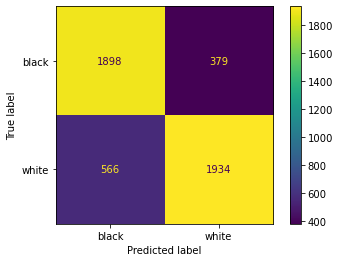

In [64]:
from sklearn.metrics import plot_confusion_matrix
final_model = dec_pipe.fit(X_train, y_train)
final_prediction = final_model.predict(X_dev)

print(classification_report(y_dev, final_prediction))
print(plot_confusion_matrix(final_model,X_dev,y_dev))

slightly worse performance on white

## Learning curve

In [62]:
from sklearn.model_selection import learning_curve

In [67]:
learning_curve(estimator = dec_pipe, X= X_train, y= y_train, cv = 10)

(array([ 859, 2794, 4728, 6663, 8598]),
 array([[0.99883586, 0.99185099, 0.99185099, 0.99185099, 0.99185099,
         0.99185099, 0.99185099, 0.99185099, 0.99185099, 0.99185099],
        [0.98747316, 0.98353615, 0.98282033, 0.9853257 , 0.9853257 ,
         0.9853257 , 0.9853257 , 0.9853257 , 0.9853257 , 0.9853257 ],
        [0.97652284, 0.97335025, 0.96150592, 0.97631134, 0.9748308 ,
         0.97736887, 0.97736887, 0.97736887, 0.97736887, 0.97736887],
        [0.96983341, 0.94687078, 0.95407474, 0.969083  , 0.96848267,
         0.95467507, 0.9681825 , 0.96938316, 0.96938316, 0.96938316],
        [0.94417306, 0.94056757, 0.94649919, 0.94498721, 0.94301   ,
         0.94556874, 0.94452198, 0.94335892, 0.94626657, 0.94382415]]),
 array([[0.65271967, 0.61401674, 0.58682008, 0.61192469, 0.6104712 ,
         0.64712042, 0.59057592, 0.61675393, 0.57696335, 0.58115183],
        [0.75209205, 0.7416318 , 0.7667364 , 0.7876569 , 0.79162304,
         0.78010471, 0.77382199, 0.79895288, 0.79685864

In [68]:
train_sizes, train_scores, test_scores = learning_curve(estimator=dec_pipe, X=X_train, y=y_train, cv=10)

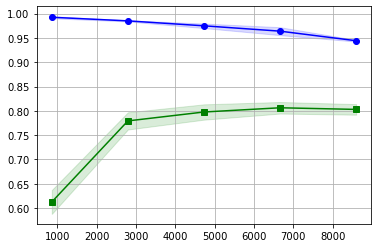

In [69]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.show()

## Validation Curve

In [72]:
from sklearn.model_selection import validation_curve

In [78]:
param_range = [0.01, 0.1, 1.0, 10.0, 100.0, 200.0,500.0]
train_scores, test_scores = validation_curve(estimator=dec_pipe, X=X_train, y=y_train, param_name='alg__max_depth', param_range=param_range, cv=10)

In [79]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(train_mean, train_std, test_mean, test_std)

[0.52334101 0.52334101 0.53231938 0.58702593 0.94428162 0.96418021
 0.96418021] [2.98176042e-05 2.98176042e-05 5.90915588e-03 4.67982315e-03
 1.66021062e-03 6.74618939e-04 6.74618939e-04] [0.52334115 0.52334115 0.52941017 0.56813939 0.80395332 0.81379318
 0.81264201] [0.0002683  0.0002683  0.00549416 0.00753648 0.01265551 0.01263306
 0.01152753]


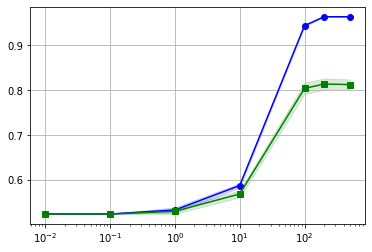

In [80]:
plt.plot(param_range, train_mean, color='blue', marker='o')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', marker='s')
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.show()

### RandomForest

In [65]:
#final pipeline
cat_features = ["opening_eco",]
num_features = ["opening_ply","turns"]

classifier = RandomForestClassifier(bootstrap = True, max_depth = 100, n_estimators =20)

    # pipeline
cat_pipe = Pipeline([
        ('selector', ItemSelector(key=cat_features)),
])

num_pipe = Pipeline([
        ('selector', ItemSelector(key=num_features)),
        ('scaler', StandardScaler())
])

forest_pipe = Pipeline([
        ('features', FeatureUnion([
            ('cat_pipe', cat_pipe),
            ('num_pipe', num_pipe)
        ])),
        ('alg', classifier)
])



              precision    recall  f1-score   support

       black       0.62      0.63      0.62      2277
       white       0.66      0.65      0.65      2500

    accuracy                           0.64      4777
   macro avg       0.64      0.64      0.64      4777
weighted avg       0.64      0.64      0.64      4777



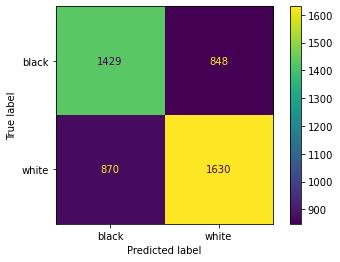

In [66]:
final_model2 = forest_pipe.fit(X_train, y_train)
final_prediction2 = final_model2.predict(X_dev)

print(classification_report(y_dev, final_prediction2))
print(plot_confusion_matrix(final_model2, X_dev, y_dev))

minor increase

### Learning curve

In [81]:
learning_curve(estimator = forest_pipe, X= X_train, y= y_train, cv = 10)

(array([ 859, 2794, 4728, 6663, 8598]),
 array([[0.99534342, 0.98603027, 0.98486612, 0.98020955, 0.98835856,
         0.98835856, 0.98603027, 0.98719441, 0.98719441, 0.98603027],
        [0.9781675 , 0.97602004, 0.97673586, 0.97888332, 0.98031496,
         0.98067287, 0.97959914, 0.97924123, 0.97852541, 0.98067287],
        [0.97081218, 0.96890863, 0.96827411, 0.96933164, 0.96806261,
         0.97081218, 0.9714467 , 0.97081218, 0.97229272, 0.97123519],
        [0.96383011, 0.96383011, 0.96142879, 0.96458052, 0.96488068,
         0.96458052, 0.96413027, 0.96383011, 0.96488068, 0.96352994],
        [0.95859502, 0.9581298 , 0.95661782, 0.95882763, 0.95836241,
         0.95964178, 0.960107  , 0.95871133, 0.9599907 , 0.95836241]]),
 array([[0.5376569 , 0.56380753, 0.52719665, 0.51046025, 0.53507853,
         0.56020942, 0.54450262, 0.54764398, 0.56544503, 0.5486911 ],
        [0.58682008, 0.55962343, 0.57217573, 0.57008368, 0.5947644 ,
         0.61151832, 0.6       , 0.60104712, 0.60418848

In [83]:
train_sizes, train_scores, test_scores = learning_curve(estimator=forest_pipe, X=X_train, y=y_train, cv=10)

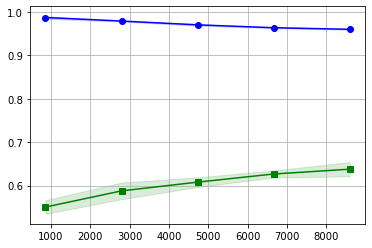

In [84]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()

### Validation curve

In [88]:
param_range = [1,5,10,50,100,200]
train_scores, test_scores = validation_curve(estimator=forest_pipe, X=X_train, y=y_train, param_name='alg__max_depth', param_range=param_range, cv=10)

In [89]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(train_mean, train_std, test_mean, test_std)

[0.53374971 0.59422444 0.7175821  0.95853976 0.95852812 0.95878399] [0.00086987 0.01448062 0.01180978 0.00067487 0.00087874 0.00075039] [0.53181965 0.57180201 0.60958729 0.63167244 0.63669949 0.63554711] [0.00455345 0.0168263  0.01024647 0.0116342  0.01226765 0.01319608]


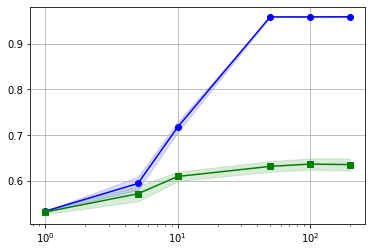

In [90]:
plt.plot(param_range, train_mean, color='blue', marker='o')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', marker='s')
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')

## Evaluation on test set

### DeciscionTree

In [95]:
tree_eval =  final_model.predict(X_test)
print(classification_report(y_test,tree_eval))

              precision    recall  f1-score   support

       black       0.79      0.84      0.81      2276
       white       0.84      0.79      0.82      2501

    accuracy                           0.82      4777
   macro avg       0.82      0.82      0.82      4777
weighted avg       0.82      0.82      0.82      4777



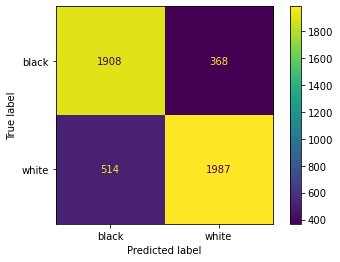

In [93]:
print(plot_confusion_matrix(final_model, X_test, y_test))

#### RandomForest

In [96]:
forest_eval =  final_model2.predict(X_test)
print(classification_report(y_test,forest_eval))

              precision    recall  f1-score   support

       black       0.63      0.62      0.63      2276
       white       0.66      0.67      0.66      2501

    accuracy                           0.65      4777
   macro avg       0.65      0.64      0.65      4777
weighted avg       0.65      0.65      0.65      4777



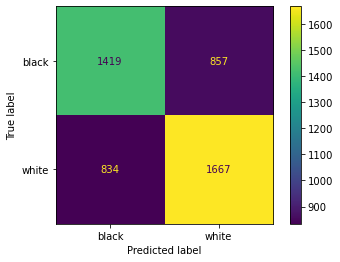

In [97]:
print(plot_confusion_matrix(final_model2, X_test, y_test))

##### Both models seem to perform even slightly better on the test set

#### Conlcusion: 
#### based on the opening moves, the length of the game, and how long and opening gets respected, we can predict to about 80% accuracy if white or black will win the game
#### This does not take into account the level of both players playing, since this will introduce a greater variance in the outcome of the game,
#### In essence, this model simulates a theoretical playbook for a chess player, based on the opening used.